In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [2]:
df = pd.read_csv("Ice_cream selling data.csv")

EDA


In [3]:
df.head()


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


In [7]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [10]:
px.box(df , x = "Ice Cream Sales (units)" )

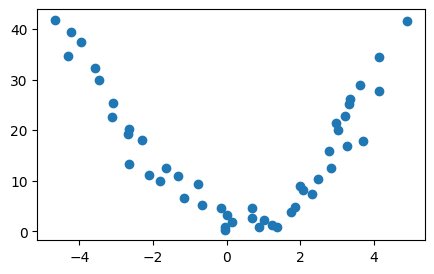

In [14]:
plt.figure(figsize=(5,3))
plt.scatter(df["Temperature (°C)"], df["Ice Cream Sales (units)"])

# Split Data

In [15]:
x = df["Temperature (°C)"].values.reshape(-1,1)
y = df["Ice Cream Sales (units)"]

# Load model

In [16]:
model = LinearRegression()

# Fit model

In [17]:
model.fit( x , y )

LinearRegression()

# model predict

In [18]:
y_pred = model.predict(x)

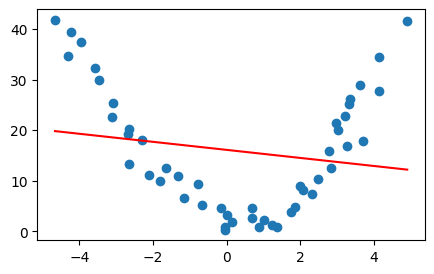

In [25]:
plt.figure(figsize=(5,3))
plt.scatter(df["Temperature (°C)"], df["Ice Cream Sales (units)"])
plt.plot(df["Temperature (°C)"] , y_pred , color = "red" )

PolynomialFeature


In [41]:
poly = PolynomialFeatures(degree=10)

In [42]:
poly.fit(x)

PolynomialFeatures(degree=10)

In [43]:
poly_x = poly.transform(x)

In [44]:
model_poly = LinearRegression()

In [45]:
model_poly.fit(poly_x , y)

LinearRegression()

In [46]:
poly_x

array([[ 1.00000000e+00, -4.66226268e+00,  2.17366933e+01,
        -1.01342174e+02,  4.72483834e+02, -2.20284375e+03,
         1.02702362e+04, -4.78825388e+04,  2.23240974e+05,
        -1.04080806e+06,  4.85252057e+06],
       [ 1.00000000e+00, -4.31655945e+00,  1.86326855e+01,
        -8.04290944e+01,  3.47176967e+02, -1.49861002e+03,
         6.46883923e+03, -2.79231291e+04,  1.20531847e+05,
        -5.20282881e+05,  2.24583199e+06],
       [ 1.00000000e+00, -4.21398476e+00,  1.77576676e+01,
        -7.48305407e+01,  3.15334758e+02, -1.32881587e+03,
         5.59960982e+03, -2.35966705e+04,  9.94360099e+04,
        -4.19021831e+05,  1.76575161e+06],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01,
        -6.16140128e+01,  2.43354469e+02, -9.61167676e+02,
         3.79628657e+03, -1.49940454e+04,  5.92213975e+04,
        -2.33904449e+05,  9.23843302e+05],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01,
        -4.58271260e+01,  1.63994832e+02, -5.86864316e+02,
  

In [47]:
#weights of columns first column always same value so 0 weight
model_poly.coef_

array([ 0.00000000e+00, -4.45187304e+00,  1.86149391e+00,  1.23790309e+00,
       -1.69848857e-01, -1.46784898e-01,  4.08539291e-02,  7.17915479e-03,
       -2.84543792e-03, -1.23614717e-04,  5.98213011e-05])

In [48]:
poly_pred = model_poly.predict(poly_x)

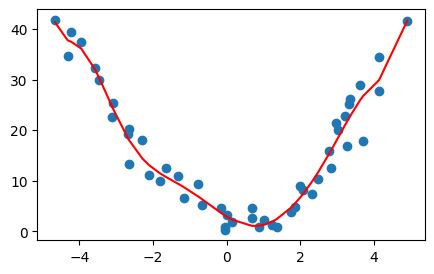

In [49]:
plt.figure(figsize=(5,3))
plt.scatter(df["Temperature (°C)"], df["Ice Cream Sales (units)"])
plt.plot(df["Temperature (°C)"] , poly_pred , color = "red" )